In [ ]:
#Project by Divya Uppal
#Goal: A fictious company named MacFlurry wants to open stores around major subway stations in 
#Manhattan. They want recommendations on where to open their stores depending on the long-
#term sustainability in the sales which is least effected by reoccurrence of Covid or any other 
#infectious disease. 

In [26]:

import pandas as pd
import datetime
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
        #print(dfs[-1])
    return pd.concat(dfs)
        



In [27]:
## IMPORTING in df1 MTA DATA FOR YEAR 2021
week_nums = [211225, 211218, 211211, 211204,
             211127, 211120, 211113, 211106,
             211030, 211023, 211016, 211009, 211002,
             210925, 210918, 210911, 210904,
             210828, 210821, 210814, 210807,
             210731, 210724, 210717, 210710, 210703,
             210626, 210619, 210612, 210605,
             210529, 210522, 210515, 210508, 210501,
             210424, 210417, 210410, 210403,
             210327, 210320, 210313, 210306,
             210227, 210220, 210213, 210206,
             210130, 210123, 210116, 210109, 210102
            ]
df1 = get_data(week_nums)
df1.columns = [column.strip() for column in df1.columns]
df1["DATE_TIME"] = pd.to_datetime(df1.DATE + " " + df1.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df1.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df1.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)





In [28]:
## IMPORTING in df2 MTA DATA FOR YEAR 2019
week_nums = [191228, 191221, 191214, 191207,
             191130, 191123, 191116, 191109,191102,
             191026, 191019, 191012, 191005,
             190928, 190921, 190914, 190907,
             190831, 190824, 190817, 190810,190803,
             190727, 190720, 190713, 190706, 
             190629, 190622, 190615, 190608, 190601,
             190525, 190518, 190511, 190504,
             190427, 190420, 190413, 190406,
             190330, 190323, 190316, 190309,190302,
             190223, 190216, 190209, 190202,
             190126, 190119, 190112, 190105
            ]

df2 = get_data(week_nums)
df2.columns = [column.strip() for column in df2.columns]
df2["DATE_TIME"] = pd.to_datetime(df2.DATE + " " + df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)




In [29]:
## IMPORTING in df3 MTA DATA FOR YEAR 2020
week_nums = [201226, 201219, 201212, 201205,
             201128, 201121, 201114, 201107,
             201031, 201024, 201017, 201010, 201003,
             200926, 200919, 200912, 200905,
             200829, 200822, 200815, 200808, 200801,
             200725, 200718, 200711, 200704,
             200627, 200620, 200613, 200606,
             200530, 200523, 200516, 200509, 200502,
             200425, 200418, 200411, 200404,
             200328, 200321, 200314, 200307,
             200229, 200222, 200215, 200208, 200201,
             200125, 200118, 200111, 200104]
df3 = get_data(week_nums)
df3.columns = [column.strip() for column in df3.columns]
df3["DATE_TIME"] = pd.to_datetime(df3.DATE + " " + df3.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df3.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df3.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


In [30]:
#REFERENCE FROM MTA EXERCISE 2 SOLUTION -- TAKING CARE IF CUMULATIVE COUNTER GET RESET TO ZERO OR A MAX COUNTER NUMBER
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        counter = min(row["ENTRIES"], row["PREV ENTRIES"])
    if counter > max_counter:
       return 0
    return counter

In [31]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df1_daily= df1.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df1_daily[['PREV DATE','PREV ENTRIES']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df1_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df1_daily["DAILY ENTRIES"]= df1_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df1_daily.drop(df1_daily[(df1_daily['DATE'].astype('datetime64').dt.year == 2020)].index , axis = 0, inplace = True)


/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64401/2189754128.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_daily[['PREV DATE','PREV ENTRIES']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


In [32]:
#FINDING DAILY ENTRIES FOR DF2 (YEAR 2019) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES


df2_daily= df2.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df2_daily[['PREV DATE','PREV ENTRIES']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df2_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df2_daily["DAILY ENTRIES"]= df2_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df2_daily.drop(df2_daily[(df2_daily['DATE'].astype('datetime64').dt.year == 2018)].index , axis = 0, inplace = True)



/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64401/4267242832.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_daily[['PREV DATE','PREV ENTRIES']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


In [33]:
#FINDING DAILY ENTRIES FOR DF3 (YEAR 2020) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES


df3_daily= df3.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df3_daily[['PREV DATE','PREV ENTRIES']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df3_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df3_daily["DAILY ENTRIES"]= df3_daily.apply(get_daily_counts, axis=1, max_counter=400000)

df3_daily.drop(df3_daily[(df3_daily['DATE'].astype('datetime64').dt.year == 2019)].index , axis = 0, inplace = True)

/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64401/2099019238.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_daily[['PREV DATE','PREV ENTRIES']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


MONTH
1     2920.055521
2     3174.064040
3     3662.728072
4     3876.859748
5     3850.158983
6     4286.901869
7     4251.777748
8     3922.145317
9     4792.614896
10    5042.059364
11    5258.150255
12    4858.097740
Name: DAILY ENTRIES, dtype: float64


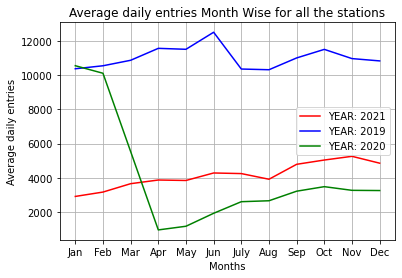

In [34]:
##Average daily entries Month Wise for all the stations together

import matplotlib.pyplot as plt

station_entries1 = df1_daily.groupby(['STATION','LINENAME','DATE'])['DAILY ENTRIES'].sum().reset_index()
station_entries2 = df2_daily.groupby(['STATION','LINENAME','DATE'])['DAILY ENTRIES'].sum().reset_index()
station_entries3 = df3_daily.groupby(['STATION','LINENAME','DATE'])['DAILY ENTRIES'].sum().reset_index()
#station_entries.sample(5)

station_entries1["DATE"] = pd.to_datetime(station_entries1["DATE"],format='%m/%d/%Y')
station_entries1["MONTH"] = station_entries1["DATE"].astype('datetime64').dt.month
avg_enteries_month1 = station_entries1.groupby("MONTH")["DAILY ENTRIES"].mean()

station_entries2["DATE"] = pd.to_datetime(station_entries2["DATE"],format='%m/%d/%Y')
station_entries2["MONTH"] = station_entries2["DATE"].astype('datetime64').dt.month
avg_enteries_month2 = station_entries2.groupby("MONTH")["DAILY ENTRIES"].mean()

station_entries3["DATE"] = pd.to_datetime(station_entries3["DATE"],format='%m/%d/%Y')
station_entries3["MONTH"] = station_entries3["DATE"].astype('datetime64').dt.month
avg_enteries_month3 = station_entries3.groupby("MONTH")["DAILY ENTRIES"].mean()


print(avg_enteries_month1)
plt.plot(avg_enteries_month1, label = 'YEAR: 2021', color = 'red')
plt.plot(avg_enteries_month2, label = 'YEAR: 2019', color = 'blue')
plt.plot(avg_enteries_month3, label = 'YEAR: 2020', color = 'green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb', 'Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.title("Average daily entries Month Wise for all the stations")
plt.grid()
plt.legend()
plt.show()

In [57]:
### Targetting the station with max Daily Entries for our research

average_enteries_2021 = station_entries1.groupby(["STATION","LINENAME"])["DAILY ENTRIES"].median().sort_values(ascending = False).reset_index()
average_enteries_2019 = station_entries2.groupby(["STATION","LINENAME"])["DAILY ENTRIES"].median().sort_values(ascending = False).reset_index()
average_enteries_2020 = station_entries3.groupby(["STATION","LINENAME"])["DAILY ENTRIES"].median().sort_values(ascending = False).reset_index()

average_enteries_2021.head(20)




,STATION,LINENAME,DAILY ENTRIES
0,34 ST-HERALD SQ,BDFMNQRW,22904.0
1,GRD CNTRL-42 ST,4567S,18392.0
2,42 ST-PORT AUTH,ACENQRS1237W,17812.0
3,JKSN HT-ROOSVLT,EFMR7,16177.0
4,FLUSHING-MAIN,7,15687.0
5,34 ST-PENN STA,ACE,13576.0
6,14 ST-UNION SQ,LNQR456W,11620.0
7,59 ST COLUMBUS,ABCD1,10071.0
8,47-50 STS ROCK,BDFM,10016.0
9,JAMAICA CENTER,EJZ,9663.0


<Figure size 432x288 with 0 Axes>

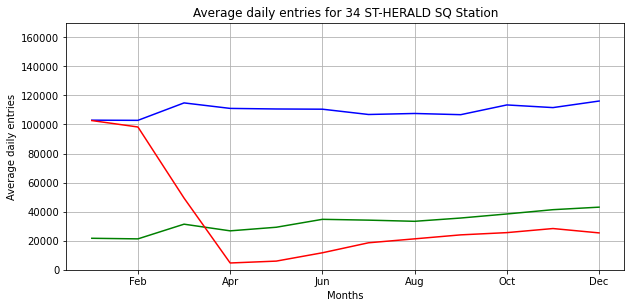

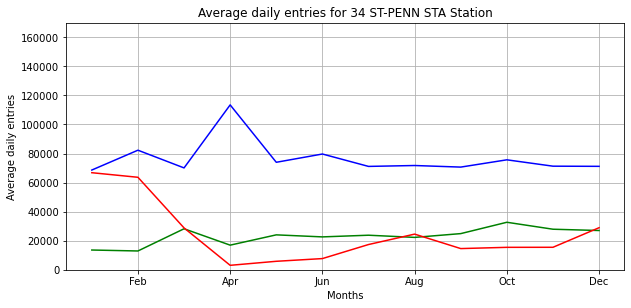

<Figure size 432x288 with 0 Axes>

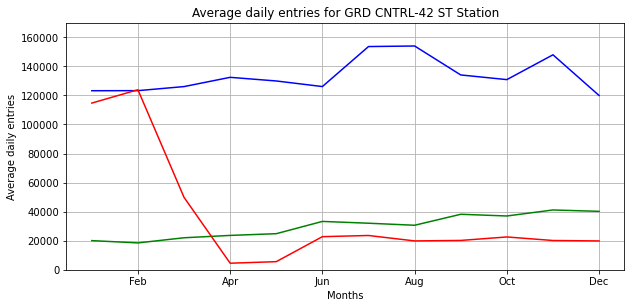

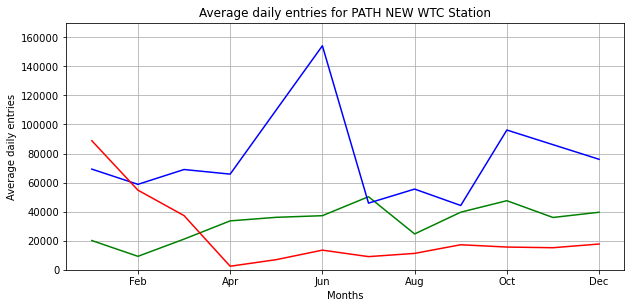

<Figure size 432x288 with 0 Axes>

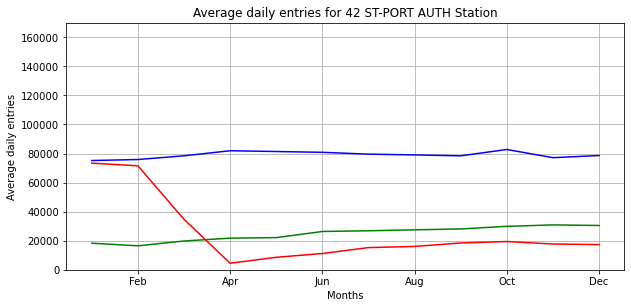

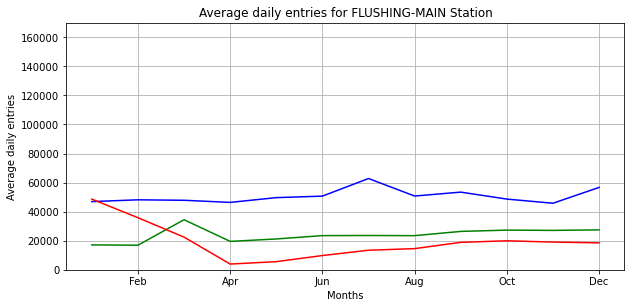

<Figure size 432x288 with 0 Axes>

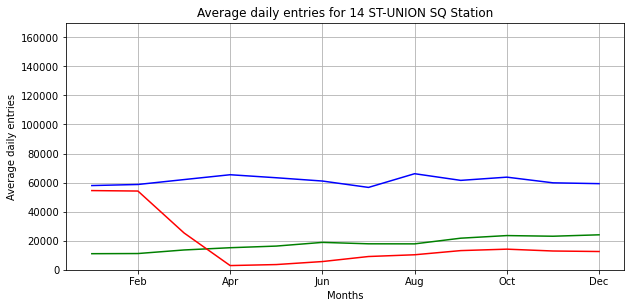

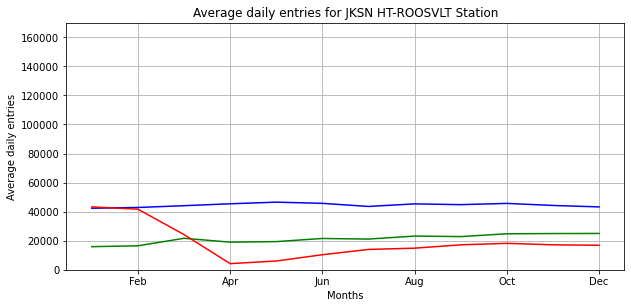

<Figure size 432x288 with 0 Axes>

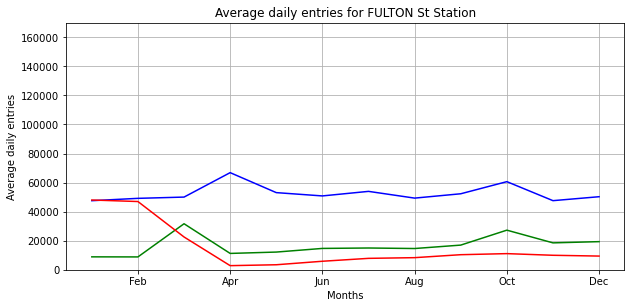

<Figure size 432x288 with 0 Axes>

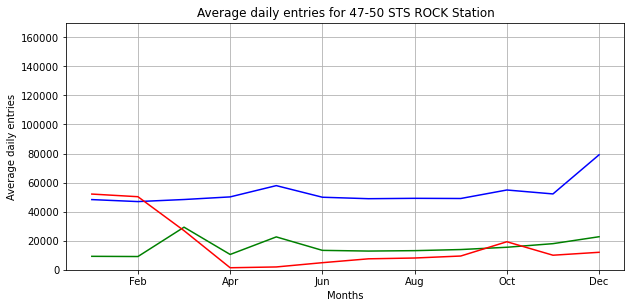

In [58]:
### Plotting daily entries for top 10 populous stations for the years: 2019,2020 and 2021
import matplotlib.pyplot as plt


mask11  = ((station_entries1['LINENAME'] == 'BDFMNQRW') & (station_entries1['STATION'] == '34 ST-HERALD SQ'))
mask12  = ((station_entries2['LINENAME'] == 'BDFMNQRW') & (station_entries2['STATION'] == '34 ST-HERALD SQ'))
mask13  = ((station_entries3['LINENAME'] == 'BDFMNQRW') & (station_entries3['STATION'] == '34 ST-HERALD SQ'))

mask21  = ((station_entries1['LINENAME'] == 'ACE') & (station_entries1['STATION'] == '34 ST-PENN STA'))
mask22  = ((station_entries2['LINENAME'] == 'ACE') & (station_entries2['STATION'] == '34 ST-PENN STA'))
mask23  = ((station_entries3['LINENAME'] == 'ACE') & (station_entries3['STATION'] == '34 ST-PENN STA'))

mask31  = ((station_entries1['LINENAME'] == '4567S') & (station_entries1['STATION'] == 'GRD CNTRL-42 ST'))
mask32  = ((station_entries2['LINENAME'] == '4567S') & (station_entries2['STATION'] == 'GRD CNTRL-42 ST'))
mask33  = ((station_entries3['LINENAME'] == '4567S') & (station_entries3['STATION'] == 'GRD CNTRL-42 ST'))

mask41  = ((station_entries1['LINENAME'] == '1') & (station_entries1['STATION'] == 'PATH NEW WTC'))
mask42  = ((station_entries2['LINENAME'] == '1') & (station_entries2['STATION'] == 'PATH NEW WTC'))
mask43  = ((station_entries3['LINENAME'] == '1') & (station_entries3['STATION'] == 'PATH NEW WTC'))

mask51  = ((station_entries1['LINENAME'] == 'ACENQRS1237W') & (station_entries1['STATION'] == '42 ST-PORT AUTH'))
mask52  = ((station_entries2['LINENAME'] == 'ACENQRS1237W') & (station_entries2['STATION'] == '42 ST-PORT AUTH'))
mask53  = ((station_entries3['LINENAME'] == 'ACENQRS1237W') & (station_entries3['STATION'] == '42 ST-PORT AUTH'))

mask61  = ((station_entries1['LINENAME'] == '7') & (station_entries1['STATION'] == 'FLUSHING-MAIN'))
mask62  = ((station_entries2['LINENAME'] == '7') & (station_entries2['STATION'] == 'FLUSHING-MAIN'))
mask63  = ((station_entries3['LINENAME'] == '7') & (station_entries3['STATION'] == 'FLUSHING-MAIN'))

mask71  = ((station_entries1['LINENAME'] == 'LNQR456W') & (station_entries1['STATION'] == '14 ST-UNION SQ'))
mask72  = ((station_entries2['LINENAME'] == 'LNQR456W') & (station_entries2['STATION'] == '14 ST-UNION SQ'))
mask73  = ((station_entries3['LINENAME'] == 'LNQR456W') & (station_entries3['STATION'] == '14 ST-UNION SQ'))

mask81  = ((station_entries1['LINENAME'] == 'EFMR7') & (station_entries1['STATION'] == 'JKSN HT-ROOSVLT'))
mask82  = ((station_entries2['LINENAME'] == 'EFMR7') & (station_entries2['STATION'] == 'JKSN HT-ROOSVLT'))
mask83  = ((station_entries3['LINENAME'] == 'EFMR7') & (station_entries3['STATION'] == 'JKSN HT-ROOSVLT'))

mask91  = ((station_entries1['LINENAME'] == '2345ACJZ') & (station_entries1['STATION'] == 'FULTON ST'))
mask92  = ((station_entries2['LINENAME'] == '2345ACJZ') & (station_entries2['STATION'] == 'FULTON ST'))
mask93  = ((station_entries3['LINENAME'] == '2345ACJZ') & (station_entries3['STATION'] == 'FULTON ST'))

mask101  = ((station_entries1['LINENAME'] == 'BDFM') & (station_entries1['STATION'] == '47-50 STS ROCK'))
mask102  = ((station_entries2['LINENAME'] == 'BDFM') & (station_entries2['STATION'] == '47-50 STS ROCK'))
mask103  = ((station_entries3['LINENAME'] == 'BDFM') & (station_entries3['STATION'] == '47-50 STS ROCK'))




station_entries4 = station_entries1[mask11].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask12].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask13].groupby("MONTH")['DAILY ENTRIES'].mean()



###################1111
plt.figure(1)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for 34 ST-HERALD SQ Station")
#plt.legend()

plt.show()
###############################22222
station_entries4 = station_entries1[mask21].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask22].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask23].groupby("MONTH")['DAILY ENTRIES'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for 34 ST-PENN STA Station")
#plt.legend()

plt.show()

##########################################33333
station_entries4 = station_entries1[mask31].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask32].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask33].groupby("MONTH")['DAILY ENTRIES'].mean()

plt.figure(2)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for GRD CNTRL-42 ST Station")
#plt.legend()

plt.show()
###############################44444

station_entries4 = station_entries1[mask41].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask42].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask43].groupby("MONTH")['DAILY ENTRIES'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for PATH NEW WTC Station")
#plt.legend()

plt.show()

##########################################55555

station_entries4 = station_entries1[mask51].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask52].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask53].groupby("MONTH")['DAILY ENTRIES'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for 42 ST-PORT AUTH Station")
#plt.legend()

plt.show()
###############################66666

station_entries4 = station_entries1[mask61].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask62].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask63].groupby("MONTH")['DAILY ENTRIES'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for FLUSHING-MAIN Station")
#plt.legend()

plt.show()

##########################################77777777

station_entries4 = station_entries1[mask71].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask72].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask73].groupby("MONTH")['DAILY ENTRIES'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for 14 ST-UNION SQ Station")
#plt.legend()

plt.show()
###############################88888888

station_entries4 = station_entries1[mask81].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask82].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask83].groupby("MONTH")['DAILY ENTRIES'].mean()


plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.xlabel("Months")
plt.ylim(0,170000)
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for JKSN HT-ROOSVLT Station")
#plt.legend()

plt.show()

##########################################9999999

station_entries4 = station_entries1[mask91].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask92].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask93].groupby("MONTH")['DAILY ENTRIES'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for FULTON St Station")
#plt.legend()

plt.show()
##########################################10

station_entries4 = station_entries1[mask101].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries5 = station_entries2[mask102].groupby("MONTH")['DAILY ENTRIES'].mean()
station_entries6 = station_entries3[mask103].groupby("MONTH")['DAILY ENTRIES'].mean()

plt.figure(3)
plt.figure(figsize=(10, 10)) 

plt.subplot(211)
plt.plot(station_entries4,color ='green') 
#label = 'Yr 2021', color ='green')
plt.plot(station_entries5,color ='blue') 
#label = 'Yr 2019', color = 'blue')
plt.plot(station_entries6,color ='red') 
#label = 'Yr 2020', color = 'red')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylim(0,170000)
plt.xlabel("Months")
plt.ylabel("Average daily entries")
plt.grid()
plt.title("Average daily entries for 47-50 STS ROCK Station")
#plt.legend()

plt.show()


###############################END

